<a href="https://colab.research.google.com/github/kiubb02/CV_class_detection/blob/main/ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Images

- Taken from: https://storage.googleapis.com/openimages/web/download_v7.html
- Classes here: Bicycle, Golf Cart, Balloonion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade pip setuptools wheel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.5/821.5 kB 22.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
!pip install fiftyone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 676.9/676.9 kB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 12.0 MB/s eta 0:00:00
  Installing build depende

## Imports

In [ ]:
import fiftyone as fo
import pandas as pd
from fiftyone import ViewField as F

# library to deal with images
from PIL import Image
from IPython.display import display

# for model training
from sklearn.model_selection import train_test_split

Migrating database to v0.23.7


INFO:fiftyone.migrations.runner:Migrating database to v0.23.7


## Main

First lets fetch the Dataset. we are using fiftyone to view and downlaod the images the images. Since we are only working with three classes we are going to filter the dataset on these 3 classes : ['Golf cart', 'Balloon', 'Bicycle'] which we have stored in an array named "classes"

In [ ]:
my_classes = ['Golf cart', 'Balloon', 'Bicycle']

In [ ]:
dataset = fo.zoo.load_zoo_dataset(
    "open-images-v7",
    split="train",
    label_types=["detections"],
    classes=my_classes,
    max_samples=1000,
    shuffle=True
)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/open-images-v7/train' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv' to '/root/fiftyone/open-images-v7/train/metadata/image_ids.csv'


 100% |██████|    4.8Gb/4.8Gb [4.8s elapsed, 0s remaining, 1.1Gb/s]         


INFO:eta.core.utils: 100% |██████|    4.8Gb/4.8Gb [4.8s elapsed, 0s remaining, 1.1Gb/s]         


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/root/fiftyone/open-images-v7/train/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmpy_t7vy2t/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v6/oidv6-train-annotations-bbox.csv' to '/root/fiftyone/open-images-v7/train/labels/detections.csv'


INFO:fiftyone.utils.openimages:Downloading 1000 images


 100% |█████████████████| 1000/1000 [2.0m elapsed, 0s remaining, 6.2 files/s]       


INFO:eta.core.utils: 100% |█████████████████| 1000/1000 [2.0m elapsed, 0s remaining, 6.2 files/s]       


Dataset info written to '/root/fiftyone/open-images-v7/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/open-images-v7/info.json'


Loading 'open-images-v7' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v7' split 'train'


 100% |███████████████| 1000/1000 [24.7s elapsed, 0s remaining, 43.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [24.7s elapsed, 0s remaining, 43.7 samples/s]      


Dataset 'open-images-v7-train-1000' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v7-train-1000' created


We have downloaded a lot of data right now. To make sure we are only working with the relevant data that we need we will have to further filter the downloaded data. That we are doing by filtering the dataset to include only the samples where the label is one of the classes specified.

In [ ]:
dataset = dataset.filter_labels("ground_truth", F("label").is_in(my_classes))

Now lets check out with what data we are actually working - This we can do by a few small Data Exploration steps

In [ ]:
num_samples = len(dataset)
print("Number of samples:", num_samples)

Number of samples: 1000


In [ ]:
samples_per_class = dataset.count_values("ground_truth.detections.label")
print("Samples per class:", samples_per_class)

Samples per class: {'Balloon': 435, 'Bicycle': 1946, 'Golf cart': 18}


In [ ]:
for sample_view in dataset[:3]:  # Iterate over the first 3 SampleView objects
    filepath = sample_view["filepath"]  # Get the filepath of the image
    image = Image.open(filepath)  # Open the image using Pillow
    display(image)  # Display the image in the notebook

Now lets focus more on the images we will need for our task here. To do so we will convert the images to "patches". Those patches focus more closly on the part of the image in which the object is seen .

**Please edit the path to fit with yours**

In [ ]:
export_dir = "drive/MyDrive/ComputerVision/images"

In [ ]:
# Convert the dataset to patches and export them
patches = dataset.to_patches("ground_truth")

patches.export(
    export_dir=export_dir,
    dataset_type=fo.types.ImageClassificationDirectoryTree,
    label_field="ground_truth",
)

Detected an image classification exporter and a label field 'ground_truth' of type <class 'fiftyone.core.labels.Detection'>. Exporting image patches...


INFO:fiftyone.utils.data.exporters:Detected an image classification exporter and a label field 'ground_truth' of type <class 'fiftyone.core.labels.Detection'>. Exporting image patches...


 100% |███████████████| 2399/2399 [1.6m elapsed, 0s remaining, 20.0 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 2399/2399 [1.6m elapsed, 0s remaining, 20.0 samples/s]      


We have now exported the patches. To use the images for training and testing purposes we will have to import or load the dataset from the directory and then split the patches

In [ ]:
import os
import shutil
import random

# Define the path to your main image directory
image_dir = "drive/MyDrive/ComputerVision/images"
export_dir = "drive/MyDrive/ComputerVision/CV"

# Define the paths for train and test directories
train_dir = os.path.join(export_dir, "train")
test_dir = os.path.join(export_dir, "test")

# Create train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
train_dir = 'drive/MyDrive/ComputerVision/CV/train'

In [ ]:
test_dir = 'drive/MyDrive/ComputerVision/CV/test'

In [ ]:
# List all class folders in the main image directory
class_folders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

In [ ]:
class_folders

['Bicycle', 'Balloon', 'Golf cart']

In [ ]:
# Define the split ratio
train_split_ratio = 0.8

# For each class folder, split images into train and test sets
for class_folder in class_folders:
    class_images = os.listdir(os.path.join(image_dir, class_folder))
    print(os.path.join(image_dir, class_folder))

drive/MyDrive/images/Bicycle
drive/MyDrive/images/Balloon
drive/MyDrive/images/Golf cart


In [ ]:
# Define the split ratio
train_split_ratio = 0.8

# For each class folder, split images into train and test sets
for class_folder in class_folders:
    class_images = os.listdir(os.path.join(image_dir, class_folder))
    random.shuffle(class_images)
    num_train_images = int(len(class_images) * train_split_ratio)

    # Copy images to train directory
    for image_file in class_images[:num_train_images]:
        src_path = os.path.join(image_dir, class_folder, image_file)
        dest_path = os.path.join(train_dir, class_folder, image_file)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.copy(src_path, dest_path)

    # Copy remaining images to test directory
    for image_file in class_images[num_train_images:]:
        src_path = os.path.join(image_dir, class_folder, image_file)
        dest_path = os.path.join(test_dir, class_folder, image_file)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.copy(src_path, dest_path)

print("Splitting into train and test sets complete.")

KeyboardInterrupt: 

In the next step we will be using the ResNet50 which is already pre-trained with the imagenet.


ResNet50 pre-trained on ImageNet is a convolutional neural network architecture designed for image recognition tasks. ImageNet provides a vast dataset for training, allowing ResNet50 to learn a broad range of visual features across numerous categories. This pre-training equips ResNet50 with the ability to extract intricate patterns and textures from images, making it highly effective for tasks such as classification, object detection, and segmentation. Leveraging ResNet50's pre-trained weights offers a significant advantage by providing a strong foundation for building custom models, reducing the need for extensive training on smaller datasets and improving performance on diverse image-related tasks.

### Imports for Model training

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Model Training - ResNet50 ; No changes ; Pre-Trained on Imagenet

Firstly we will need our test and train data back. For that please define where the train and test data has been saved in your OS for the code to run through. The definitions of the train and test directory have already been done before !!

In [ ]:
# Image dimensions
img_height, img_width = 224, 224
batch_size = 32

In [ ]:
# Data normalization for training and testing
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Prepare data generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2150 images belonging to 3 classes.
Found 481 images belonging to 3 classes.


In [ ]:
# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
# Global average pooling and output layer
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(train_generator.num_classes, activation='softmax')(x)

In [ ]:
# Construct the model
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Freeze the base ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define the file path for model checkpoint
model_checkpoint_file = "drive/MyDrive/models/model_og_checkpoint.keras"

# Define callbacks
checkpoint = ModelCheckpoint(model_checkpoint_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
tensorboard = TensorBoard(log_dir="logs", histogram_freq=1)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping, tensorboard]
)

Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 0.4651 - accuracy: 0.8113
Epoch 1: val_accuracy improved from -inf to 0.81081, saving model to drive/MyDrive/models/model_og_checkpoint.keras
60/60 [==============================] - 487s 8s/step - loss: 0.4651 - accuracy: 0.8113 - val_loss: 0.4005 - val_accuracy: 0.8108
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 0.3904 - accuracy: 0.8113
Epoch 2: val_accuracy improved from 0.81081 to 0.86279, saving model to drive/MyDrive/models/model_og_checkpoint.keras
60/60 [==============================] - 497s 8s/step - loss: 0.3904 - accuracy: 0.8113 - val_loss: 0.3672 - val_accuracy: 0.8628
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 0.3626 - accuracy: 0.8467
Epoch 3: val_accuracy did not improve from 0.86279
60/60 [==============================] - 528s 9s/step - loss: 0.3626 - accuracy: 0.8467 - val_loss: 0.3527 - val_accuracy: 0.8108
Epoch 4/10
60/60 [========================

In [ ]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8959 - loss: 0.3362
Test loss: 0.398516982793808
Test accuracy: 0.8904382586479187


In [ ]:
# Check if the model file exists
if not os.path.exists(model_checkpoint_file):
    raise FileNotFoundError(f"Model file '{model_checkpoint_file}' not found.")

In [ ]:
from tensorflow.keras.models import load_model
# Load the trained model
model_checkpoint_file = "drive/MyDrive/ComputerVision/models/model_og_checkpoint.keras"
model = load_model(model_checkpoint_file)

In [ ]:
# Compute the number of parameters of the model
num_params = model.count_params()
print("Number of parameters of the model:", num_params)

Number of parameters of the model: 23593859


In [ ]:
import numpy as np

test_generator.reset()
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = test_generator.classes  # True class labels from the generator

16/16 [==============================] - 26s 2s/step


In [ ]:
test_generator.reset()
model.evaluate(test_generator)

16/16 [==============================] - 26s 2s/step - loss: 0.3019 - accuracy: 0.9210


[0.3019477128982544, 0.9209979176521301]

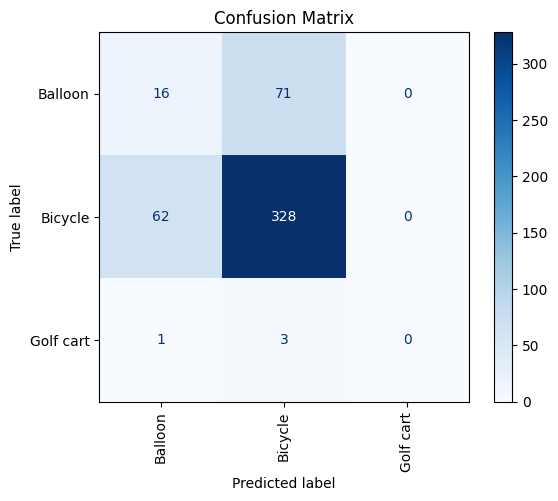

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
class_names = sorted(os.listdir(train_dir))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

In the next steps we want to see how the model changes if we augment the images to an extent:

- Random flip
- Random rotate
- Random transition

So lets see how different random types of data augmentation will change the results of the accuracy of the modelion


In [ ]:
# Define different parameters for data augmentation
augmentation_params = [
    {"horizontal_flip": True},
    {"rotation_range": 30},
    {"width_shift_range": 0.2},
    {"height_shift_range": 0.2},
    {"horizontal_flip": True, "rotation_range": 30, "width_shift_range": 0.2},
    {"horizontal_flip": True, "rotation_range": 30, "height_shift_range": 0.2},
    {"horizontal_flip": True, "width_shift_range": 0.2, "height_shift_range": 0.2},
]

In [ ]:
# Image dimensions
img_height, img_width = 224, 224
batch_size = 32
num_classes = len(os.listdir(train_dir))  # Number of classes

In [ ]:
# Train models with different augmentation parameters
for i, params in enumerate(augmentation_params):
    print(f"Training model {i+1} with augmentation parameters: {params}")

    # Data augmentation for training data
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        **params
    )

    # Data normalization for testing data
    test_datagen = ImageDataGenerator(rescale=1./255)

    # Prepare data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Load pre-trained ResNet50 model
    base_model = ResNet50(weights='imagenet', include_top=False)

    # Global average pooling and output layer
    x = GlobalAveragePooling2D()(base_model.output)
    output = Dense(num_classes, activation='softmax')(x)

    # Construct the model
    model = Model(inputs=base_model.input, outputs=output)

    # Freeze the base ResNet50 layers
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks
    checkpoint = ModelCheckpoint(f"drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_{i}.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
    tensorboard = TensorBoard(log_dir=f"logs_augmented_{i}", histogram_freq=1)

    # Train the model with data augmentation
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator,
        callbacks=[checkpoint, early_stopping, tensorboard]
    )

    # Evaluate the model on test set
    test_loss, test_accuracy = model.evaluate(test_generator)
    print("Test loss:", test_loss)
    print("Test accuracy:", test_accuracy)

Training model 1 with augmentation parameters: {'horizontal_flip': True}
Found 1918 images belonging to 3 classes.
Found 481 images belonging to 3 classes.
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
60/60 [==============================] - ETA: 0s - loss: 0.5154 - accuracy: 0.7675
Epoch 1: val_accuracy improved from -inf to 0.81081, saving model to drive/MyDrive/models/model_checkpoint_augmented_0.keras
60/60 [==============================] - 228s 4s/step - loss: 0.5154 - accuracy: 0.7675 - val_loss: 0.4009 - val_accuracy: 0.8108
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 0.3942 - accuracy: 0.8201
Epoch 2: val_accuracy did not improve from 0.81081
60/60 [==============================] - 21s 356ms/step - loss: 0.3942 - accuracy: 0.8201 - val_loss: 0.3672 - val_accuracy: 0.8108
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 0.3649 - accuracy: 0.8431
Epoch 3: val_accuracy improved from 0.81081 to 0.88358, sav

Model: drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_0.keras
Number of parameters of the model: 23593859
16/16 [==============================] - 210s 14s/step - loss: 0.3073 - accuracy: 0.9189
Test loss: 0.3072587847709656
Test accuracy: 0.9189189076423645
16/16 [==============================] - 26s 2s/step


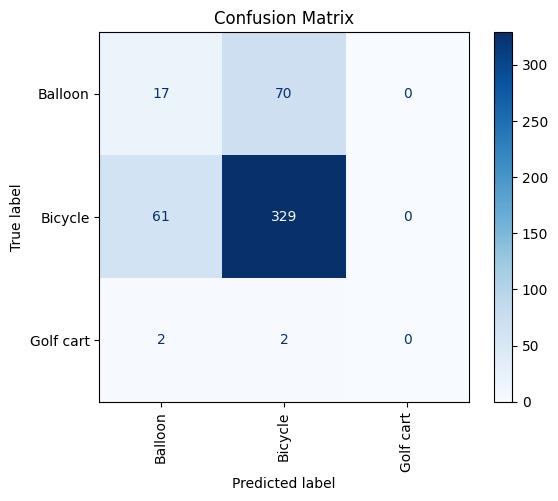

Model: drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_1.keras
Number of parameters of the model: 23593859
16/16 [==============================] - 27s 1s/step - loss: 0.3640 - accuracy: 0.9023
Test loss: 0.3639596998691559
Test accuracy: 0.9022868871688843
16/16 [==============================] - 26s 2s/step


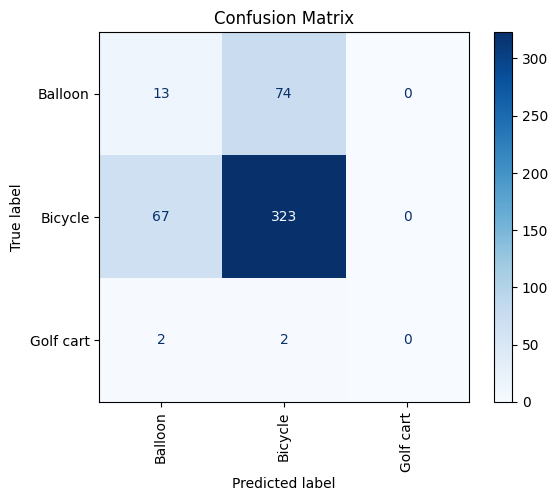

Model: drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_2.keras
Number of parameters of the model: 23593859
16/16 [==============================] - 26s 1s/step - loss: 0.3054 - accuracy: 0.9210
Test loss: 0.3054099380970001
Test accuracy: 0.9209979176521301
16/16 [==============================] - 27s 2s/step


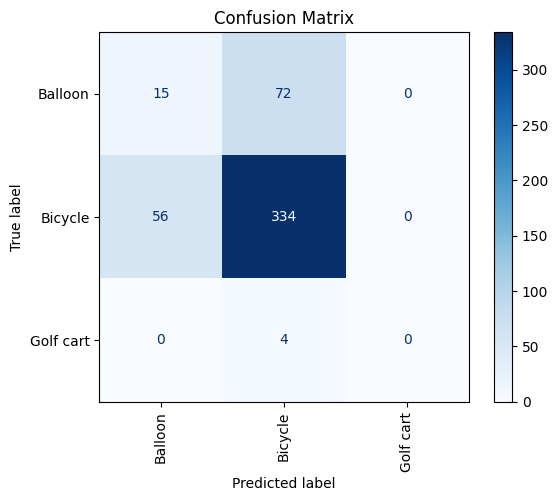

Model: drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_3.keras
Number of parameters of the model: 23593859
16/16 [==============================] - 27s 2s/step - loss: 0.3096 - accuracy: 0.9189
Test loss: 0.3096306622028351
Test accuracy: 0.9189189076423645
16/16 [==============================] - 26s 2s/step


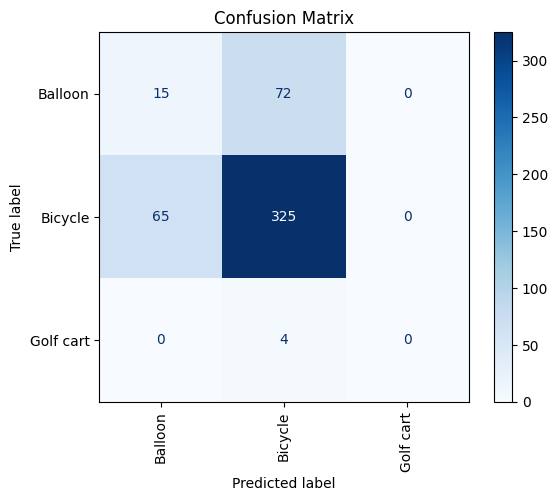

Model: drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_4.keras
Number of parameters of the model: 23593859
16/16 [==============================] - 27s 2s/step - loss: 0.3352 - accuracy: 0.9127
Test loss: 0.3352212905883789
Test accuracy: 0.9126819372177124
16/16 [==============================] - 26s 2s/step


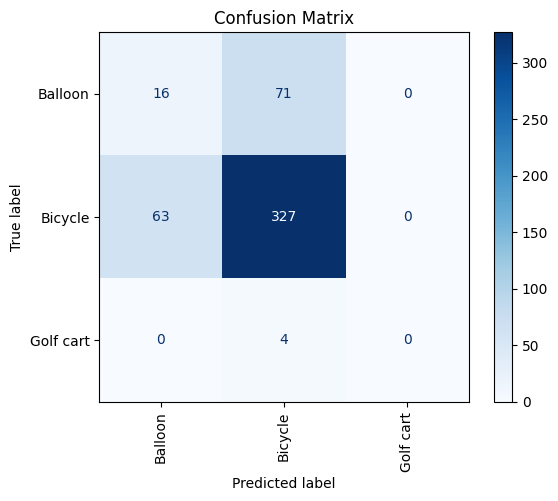

Model: drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_5.keras
Number of parameters of the model: 23593859
 6/16 [==========>...................] - ETA: 15s - loss: 0.3376 - accuracy: 0.8906

KeyboardInterrupt: 

In [ ]:
for i in range(6):
    model_checkpoint_file = f"drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_{i}.keras"
    print(f"Model: {model_checkpoint_file}")

    # load the model
    model = load_model(model_checkpoint_file)

    # check number of paramters
    num_params = model.count_params()
    print("Number of parameters of the model:", num_params)

    # check the test accuracy
    test_loss, test_accuracy = model.evaluate(test_generator)
    print("Test loss:", test_loss)
    print("Test accuracy:", test_accuracy)

    # print the confusion matrix
    test_generator.reset()
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
    y_true = test_generator.classes  # True class labels from the generator

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred_classes)

    # Plot the confusion matrix
    class_names = sorted(os.listdir(train_dir))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.xticks(rotation=90)
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
# Initialize lists to store results
results_list = []
confusion_matrices = []

# Load and evaluate each model
for i in range(6):
    model_file = f"drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_{i}.keras"
    # Load the trained model
    model = load_model(model_file)

    # Compute the number of parameters of the model
    num_params = model.count_params()

    # Generate predictions for the test set
    test_generator.reset()
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
    y_true = test_generator.classes  # True class labels from the generator

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
    confusion_matrices.append(conf_matrix)

    # Calculate test accuracy and loss
    test_loss, test_accuracy = model.evaluate(test_generator)

    # Append results to list
    results_list.append({
        "Model File": model_file,
        "Test Accuracy": test_accuracy,
        "Test Loss": test_loss,
        "Number of Parameters": num_params
    })

# Convert lists to DataFrames
results_df = pd.DataFrame(results_list)

# Concatenate confusion matrices
confusion_df = pd.DataFrame(np.sum(confusion_matrices, axis=0), index=class_names, columns=class_names)


16/16 [==============================] - 107s 7s/step - loss: 0.3280 - accuracy: 0.9064


In [ ]:
results_df

,Model File,Test Accuracy,Test Loss,Number of Parameters
0,model_checkpoint_augmented_0.keras,0.896414,0.387794,23593859
1,model_checkpoint_augmented_1.keras,0.900398,0.386076,23593859
2,model_checkpoint_augmented_2.keras,0.896414,0.383609,23593859
3,model_checkpoint_augmented_3.keras,0.890438,0.388047,23593859
4,model_checkpoint_augmented_4.keras,0.890438,0.375792,23593859
5,model_checkpoint_augmented_5.keras,0.892430,0.412824,23593859


In [ ]:
confusion_df

,Balloon,Bicycle,Golf cart
Balloon,111,561,0
Bicycle,389,1903,0
Golf cart,6,42,0


<Figure size 1000x800 with 0 Axes>

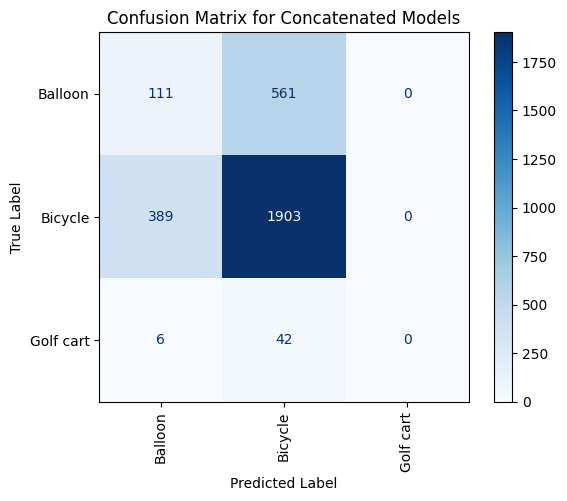

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_df.values, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title('Confusion Matrix for Concatenated Models')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Now lets experiment a bit with the Architecture of the ResNet50 by doing the following step by step and evaluating the models:
before

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Image dimensions
img_height, img_width = 224, 224
batch_size = 32
num_classes = len(os.listdir(train_dir))  # Number of classes

# Data normalization for training and testing
datagen = ImageDataGenerator(rescale=1./255)

# Prepare data generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

for i in range(1,4):
  # Load pre-trained ResNet50 model
  base_model = ResNet50(weights='imagenet', include_top=False)

  # Freeze layers up to conv2_block1_out
  freeze_until_layer = 'conv2_block1_out'
  freeze = True

  model_file = f"drive/MyDrive/ComputerVision/models/model_checkpoint_architecture_{i}.keras"

  for layer in base_model.layers:

    if layer.name == freeze_until_layer:
      freeze = False
    layer.trainable = not freeze

    # Get the output of conv3_block4_out
    x = base_model.get_layer('conv3_block4_out').output

  # Add convolutional layers
    x = Conv2D(512, (3, 3), padding='same', strides=(1, 1))(x)
    x = LeakyReLU()(x)

    if i>1:
      x = Conv2D(1024, (1, 1), padding='same', strides=(1, 1))(x)
      x = LeakyReLU()(x)

    if i>2:
      x = Conv2D(1024, (3, 3), padding='same', strides=(2, 2))(x)
      x = LeakyReLU()(x)

    # Add global average pooling and output layer
    x = GlobalAveragePooling2D()(x)
    output = Dense(num_classes, activation='softmax')(x)

    # Construct the model
    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks
    checkpoint = ModelCheckpoint("model_cust_1_checkpoint.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
    tensorboard = TensorBoard(log_dir="logs", histogram_freq=1)

    # Train the model
    history = model.fit(
      train_generator,
      epochs=10,
      validation_data=test_generator,
      callbacks=[checkpoint, early_stopping, tensorboard]
    )

  # Evaluate the model on test set
    test_loss, test_accuracy = model.evaluate(test_generator)
    print("Test loss Model",i,": ", test_loss)
    print("Test accuracy: ", test_accuracy)

Found 2150 images belonging to 3 classes.
Found 481 images belonging to 3 classes.
Epoch 1/10
60/68 [=========================>....] - ETA: 32s - loss: 1.4210 - accuracy: 0.8849

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) UNKNOWN:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7eff7c121c60>
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 917, in wrapped_generator
    for data in generator_fn():

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 1064, in generator_fn
    yield x[i]

  File "/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py", line 423, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3283, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7eff7c121c60>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) UNKNOWN:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7eff7c121c60>
Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 917, in wrapped_generator
    for data in generator_fn():

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/data_adapter.py", line 1064, in generator_fn
    yield x[i]

  File "/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py", line 423, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3283, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7eff7c121c60>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_20954]

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Image dimensions
img_height, img_width = 224, 224
batch_size = 32
num_classes = len(os.listdir(train_dir))  # Number of classes

# Data normalization for training and testing
datagen = ImageDataGenerator(rescale=1./255)

# Prepare data generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Freeze layers up to conv2_block1_out
freeze_until_layer = 'conv2_block1_out'
freeze = True
for layer in base_model.layers:
    if layer.name == freeze_until_layer:
        freeze = False
    layer.trainable = not freeze

# Get the output of conv3_block4_out
x = base_model.get_layer('conv3_block4_out').output

# Add convolutional layers
x = Conv2D(512, (3, 3), padding='same', strides=(1, 1))(x)
x = LeakyReLU()(x)

x = Conv2D(1024, (1, 1), padding='same', strides=(1, 1))(x)
x = LeakyReLU()(x)

#x = Conv2D(1024, (3, 3), padding='same', strides=(2, 2))(x)
#x = LeakyReLU()(x)

# Add global average pooling and output layer
x = GlobalAveragePooling2D()(x)
output = Dense(num_classes, activation='softmax')(x)

# Construct the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint("model_cust_2_checkpoint.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
tensorboard = TensorBoard(log_dir="logs", histogram_freq=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping, tensorboard]
)

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Found 2005 images belonging to 3 classes.
Found 502 images belonging to 3 classes.
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7126 - loss: 1.9890
Epoch 1: val_accuracy improved from -inf to 0.76096, saving model to model_cust_2_checkpoint.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 281s 4s/step - accuracy: 0.7142 - loss: 1.9728 - val_accuracy: 0.7610 - val_loss: 1.5940
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9069 - loss: 0.2873
Epoch 2: val_accuracy did not improve from 0.76096
63/63 ━━━━━━━━━━━━━━━━━━━━ 245s 4s/step - accuracy: 0.9070 - loss: 0.2869 - val_accuracy: 0.7610 - val_loss: 1.0001
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9310 - loss: 0.2257
Epoch 3: val_accuracy did not improve from 0.76096
63/63 ━━━━━━━━━━━━━━━━━━━━ 236s 4s/step - accuracy: 0.9310 - loss: 0.2260 - val_accuracy: 0.7610 - val_loss: 2.9065
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9368 - loss: 0.2275
Epoch 4: val_accuracy did not improv

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Image dimensions
img_height, img_width = 224, 224
batch_size = 32
num_classes = len(os.listdir(train_dir))  # Number of classes

# Data normalization for training and testing
datagen = ImageDataGenerator(rescale=1./255)

# Prepare data generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Freeze layers up to conv2_block1_out
freeze_until_layer = 'conv2_block1_out'
freeze = True
for layer in base_model.layers:
    if layer.name == freeze_until_layer:
        freeze = False
    layer.trainable = not freeze

# Get the output of conv3_block4_out
x = base_model.get_layer('conv3_block4_out').output

# Add convolutional layers
x = Conv2D(512, (3, 3), padding='same', strides=(1, 1))(x)
x = LeakyReLU()(x)

x = Conv2D(1024, (1, 1), padding='same', strides=(1, 1))(x)
x = LeakyReLU()(x)

x = Conv2D(1024, (3, 3), padding='same', strides=(2, 2))(x)
x = LeakyReLU()(x)

# Add global average pooling and output layer
x = GlobalAveragePooling2D()(x)
output = Dense(num_classes, activation='softmax')(x)

# Construct the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
checkpoint = ModelCheckpoint("model_cust_3_checkpoint.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
tensorboard = TensorBoard(log_dir="logs", histogram_freq=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping, tensorboard]
)

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Found 2005 images belonging to 3 classes.
Found 502 images belonging to 3 classes.
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5523 - loss: 20.1154
Epoch 1: val_accuracy improved from -inf to 0.76096, saving model to model_cust_3_checkpoint.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 545s 8s/step - accuracy: 0.5534 - loss: 19.9431 - val_accuracy: 0.7610 - val_loss: 2.0531
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7406 - loss: 0.8196
Epoch 2: val_accuracy did not improve from 0.76096
63/63 ━━━━━━━━━━━━━━━━━━━━ 370s 6s/step - accuracy: 0.7409 - loss: 0.8173 - val_accuracy: 0.7610 - val_loss: 0.7957
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8231 - loss: 0.4437
Epoch 3: val_accuracy improved from 0.76096 to 0.85657, saving model to model_cust_3_checkpoint.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 367s 6s/step - accuracy: 0.8238 - loss: 0.4427 - val_accuracy: 0.8566 - val_loss: 0.4038
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.919

In [ ]:
# Initialize lists to store results
results_list = []
confusion_matrices = []

# Load and evaluate each model
for i in range(1,4):
    model_file = f"model_cust_{i}_checkpoint.keras"
    # Load the trained model
    model = load_model(model_file)

    # Compute the number of parameters of the model
    num_params = model.count_params()

    # Generate predictions for the test set
    test_generator.reset()
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
    y_true = test_generator.classes  # True class labels from the generator

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
    confusion_matrices.append(conf_matrix)

    # Calculate test accuracy and loss
    test_loss, test_accuracy = model.evaluate(test_generator)

    # Append results to list
    results_list.append({
        "Model File": model_file,
        "Test Accuracy": test_accuracy,
        "Test Loss": test_loss,
        "Number of Parameters": num_params
    })

# Convert lists to DataFrames
results_df = pd.DataFrame(results_list)

# Concatenate confusion matrices
confusion_df = pd.DataFrame(np.sum(confusion_matrices, axis=0), index=class_names, columns=class_names)


C:\Users\chiar\anaconda3\envs\cv_cnn\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 202 variables whereas the saved optimizer has 162 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 914ms/step - accuracy: 0.8600 - loss: 0.3788


C:\Users\chiar\anaconda3\envs\cv_cnn\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 206 variables whereas the saved optimizer has 166 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7650 - loss: 1.5631


C:\Users\chiar\anaconda3\envs\cv_cnn\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 210 variables whereas the saved optimizer has 170 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8520 - loss: 0.3931


In [ ]:
results_df

,Model File,Test Accuracy,Test Loss,Number of Parameters
0,model_cust_1_checkpoint.keras,0.850598,0.390759,3821443
1,model_cust_2_checkpoint.keras,0.760956,1.612451,4348291
2,model_cust_3_checkpoint.keras,0.856574,0.405153,13786499


<Figure size 1000x800 with 0 Axes>

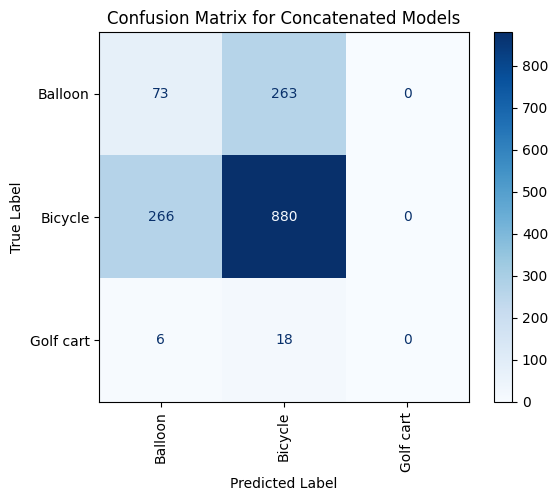

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_df.values, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title('Confusion Matrix for Concatenated Models')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Activation Map

Now we want to test classify some new images.

In [ ]:
import numpy as np
# Load your pre-trained model
model_checkpoint_file = "drive/MyDrive/ComputerVision/models/model_og_checkpoint.keras"
model = tf.keras.models.load_model(model_checkpoint_file)

The following code is from here:
https://keras.io/examples/vision/grad_cam/

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras

# Display
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt

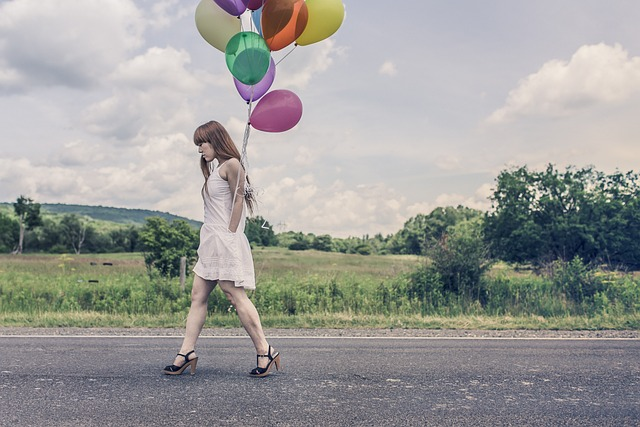

In [ ]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "conv5_block3_out"

# The local path to our target image
img_path = 'drive/MyDrive/ComputerVision/ImagesFromInternet/balloons-388973_640.jpg'

display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
from tensorflow.keras.models import load_model

#load model
model = load_model(model_checkpoint_file)

# Remove last layer's softmax
#model.layers[-1].activation = None

1/1 [==============================] - 1s 1s/step


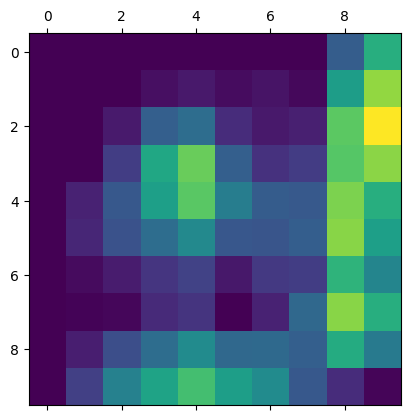

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Print what the top predicted class is
preds = model.predict(img_array)
#print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array,model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

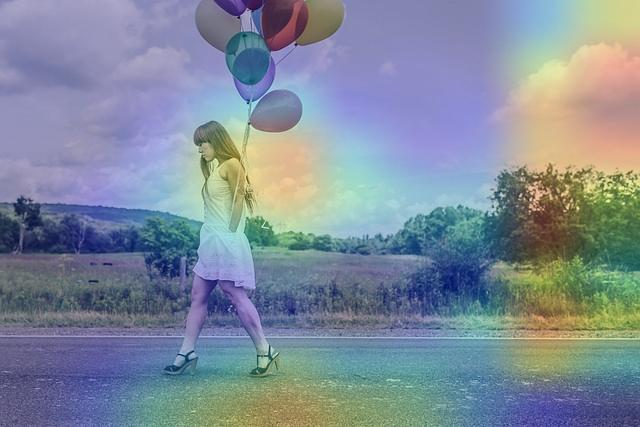

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

In [ ]:
preds

array([[2.5385363e-05, 9.9997437e-01, 2.1884196e-07]], dtype=float32)